# LAB 2

## TASK 1-3

In [31]:
library(twitteR) 

#Setting up connection with Twitter API
consumer_key <- "29bmg1JpaZU9Dk036366t8yX4"
consumer_secret <-"Qrr5yU7PeoVeT0blepEd15o2JqG4uGtX0to0QsJGCaFg2QD2mV"
access_token <- "2918544254-vR49cM0FiRZ7gErjM98dm91VLb98dCiehz0D8j7"
access_secret <- "HFh89YacW2ajQ9wpx0CBgFmLJsAqTbKZczVO8m8QeIVaL" 
setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_secret)

#Collecting tweets with given keyword
tw = strip_retweets(searchTwitter('lacrosse', n = 10000))
d = twListToDF(tw)

#Saving the tweets to RDS
#saveRDS(d, file = "rds\\flu.rds")

[1] "Using direct authentication"


In [34]:
write.table(d$text, "rds\\lacrosse.txt", append = FALSE, sep = "\n",
            row.names = FALSE)

In [33]:
length(d$text)
saveRDS(d, file = "rds\\lacrosse.rds")

[1] 4855

In [24]:
d

text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
1    Not only do we offer spectacular golf, but we have some pretty awesome beaches too. #GulfShores and #OrangeBeach Al… https://t.co/LJOSMA8fk7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
2    <U+30B9><U+30B7><U+30ED><U+30FC><U+306E><U+300C><U+51FA><U+6C41><U+5165><U+308A><U+9D8F><U+304C><U+3089><U+91A4><U+6CB9><U+5473><U+30E9><U+30FC><U+30E1><U+30F3><U+300D>\nhttps://t.co/1HLJLQxL2q\nhttps://t.co/J9n3n8cvZP                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3    From the golf course to learning sessions and insider events, here's a recap of what went down last week at the 201… https://t.co/v9ZuPivV2O                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
4    Corey Conners' story — and wife Malory's reaction — a big hit at Masters https://t.co/QRe4X5X03G https://t.co/UHnkqtnPmv                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
5    <U+30D5><U+30A3><U+30E9> <U+30C4><U+30A4><U+30EB><U+30D1><U+30F3><U+30C4> <U+30B9><U+30C8><U+30EC><U+30C3><U+30C1> <U+30D1><U+30F3><U+30C4> 748329 FILA <U+3010><U+5168>5<U+8272><U+3011><U+4EBA><U+6C17><U+30D6><U+30E9><U+30F3><U+30C9>FILA<U+306E><U+30ED><U+30F3><U+30B0><U+30D1><U+30F3><U+30C4>!<U+88FE><U+306E><U+30B9><U+30EA><U+30C3><U+30C8><U+3067><U+88FE><U+4E0A><U+3052><U+3044><U+3089><U+305A>!<U+3059><U+3050><U+306B><U+30D7><U+30EC><U+30FC><U+306B><U+5C65><U+3044><U+3066><U+3044><U+3051><U+308B>!<U+30D9><U+30EB><U+30C8><U

In [24]:
#Populating Screen Names
usernames <- d$screenName

#Looking up the Screen Names
#temp_df <- twListToDF(lookupUsers(usernames))

In [310]:
library("stringr")

#Getting dictionary of US states with abbreviations
dictionary <- read.csv("https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv")

#Creating a piped dictionary to search for relavant data
piped_dict <- paste(str_c(dictionary$State, sep = "|", dictionary$Abbreviation), collapse = '|')

#REGEX pattern matching
y<-str_detect(temp_df$location, piped_dict)
z<-str_extract(temp_df$location, piped_dict)

#Printing total matched data
table(y)["TRUE"]

TRUE 
4592

In [311]:
#Processing data for count
temp_loc <- cbind(temp_df$location, z)
final_data <- cbind(z[y])

#Creating a HashMap for storing State counts
#install.packages("hashmap")
library(hashmap)
H <- hashmap(as.character(dictionary$State), integer(51))

#HashMap for State Lookup
stateToState <- hashmap(as.character(dictionary$Abbreviation), as.character(dictionary$State))
stateToState$insert(as.character(dictionary$State), as.character(dictionary$State))

#stateNames <- data
stateName <- data.frame(matrix(ncol = 1, nrow = 0))
names(stateName)<-c("STATENAME")

#Populating HashMap
for(i in final_data[,1]) {
    val<-H[[as.factor(stateToState[[as.factor(i)]])]]
    val=val+1
    H$insert(as.factor(stateToState[[as.factor(i)]]), val)
    
    temp <- data.frame(stateToState[[as.factor(i)]])
    names(temp)<-c("STATENAME")
    stateName <- rbind(stateName, temp)
}

#Making Dataframe for Map Data
mapInput <- data.frame(matrix(ncol = 3, nrow = 0))
x <- c("STATENAME", "ACTIVITY LEVEL", "ACTIVITY LEVEL LABEL")
colnames(mapInput) <- x

bracket<-max(H$values())/40
for(i in H$keys()) {
    level <- as.integer(H[[i]]/bracket)
    if(level>10){ level<-10}
    temp <- data.frame(i, paste("Level", toString(level)), "Not Needed")
    names(temp)<-c("STATENAME", "ACTIVITY LEVEL", "ACTIVITY LEVEL LABEL")
    mapInput <- rbind(mapInput, temp)
}

#write.csv(mapInput, file = "data\\Task3Data\\combinedMapData.csv")

## TASK 4-6

In [ ]:
#Install the following packages before Running the code below
#install.packages("magrittr")
#install.packages("fiftystater")
#install.packages("mapproj")
#devtools::install_github("wmurphyrd/fiftystater")
#require(gridExtra)

Influenza Map Code

In [318]:
library(magrittr)
library(fiftystater)
library(mapproj)
library(ggplot2)
FLU_MAP <- read.csv("data\\Task3Data\\influenzaMapData.csv")
FLU_MAP <- FLU_MAP %>% dplyr::select(STATENAME, ACTIVITY.LEVEL, ACTIVITY.LEVEL.LABEL)

activitylevels <- FLU_MAP$ACTIVITY.LEVEL

prunedActivityLevels <- seq(1,51)
for (i in seq(1,51)) {
  process <-as.character(activitylevels[i]) %>% strsplit(" ") %>% extract2(1) %>% extract(2) %>% as.integer()
    
  prunedActivityLevels[i] <- process
}


FLU_MAP$ACTIVITY.LEVEL <- prunedActivityLevels %>% factor(levels = c("10", "9", "8", "7", "6", "5", "4", "3", "2", "1", "0"))

FLU_MAP$STATENAME <- FLU_MAP$STATENAME %>% tolower()

influenza <- ggplot(FLU_MAP, aes(fill=ACTIVITY.LEVEL, map_id=STATENAME)) +
  geom_map(map=fifty_states, color = 'black', size = 0.1) +
  expand_limits(x=fifty_states$long, y=fifty_states$lat) +
  coord_map() +
  theme_classic() +
  ggtitle("Influenza keyword heat map") +
  scale_fill_manual(drop=FALSE, name = "ILI Activity Level", values = c("#cc0000", "#fa4f00", "#fc8200", "#fcb100", "#f7df00", "#e0f500", "#baf700", "#8cf700", "#5bf700", "#00c200", "white")) +
  theme(axis.title.x=element_blank(), axis.text.x=element_blank(),
        axis.ticks.x=element_blank(), axis.title.y = element_blank(),
        axis.text.y = element_blank(), axis.ticks.y = element_blank(),
        line = element_blank(),plot.title = element_text(hjust = 0.5, face = 'bold', size = 10),
        legend.title = element_text(face = 'bold', size = 8))

Got Flu Map Code

In [319]:
library(magrittr)
library(fiftystater)
library(mapproj)
library(ggplot2)
FLU_MAP <- read.csv("data\\Task3Data\\gotFluMapData.csv")
FLU_MAP <- FLU_MAP %>% dplyr::select(STATENAME, ACTIVITY.LEVEL, ACTIVITY.LEVEL.LABEL)

activitylevels <- FLU_MAP$ACTIVITY.LEVEL

prunedActivityLevels <- seq(1,51)
for (i in seq(1,51)) {
  process <-as.character(activitylevels[i]) %>% strsplit(" ") %>% extract2(1) %>% extract(2) %>% as.integer()
    
  prunedActivityLevels[i] <- process
}


FLU_MAP$ACTIVITY.LEVEL <- prunedActivityLevels %>% factor(levels = c("10", "9", "8", "7", "6", "5", "4", "3", "2", "1", "0"))

FLU_MAP$STATENAME <- FLU_MAP$STATENAME %>% tolower()

gotFlu <- ggplot(FLU_MAP, aes(fill=ACTIVITY.LEVEL, map_id=STATENAME)) +
  geom_map(map=fifty_states, color = 'black', size = 0.1) +
  expand_limits(x=fifty_states$long, y=fifty_states$lat) +
  coord_map() +
  theme_classic() +
  ggtitle("Got Flu keyword heat map") +
  scale_fill_manual(drop=FALSE, name = "ILI Activity Level", values = c("#cc0000", "#fa4f00", "#fc8200", "#fcb100", "#f7df00", "#e0f500", "#baf700", "#8cf700", "#5bf700", "#00c200", "white")) +
  theme(axis.title.x=element_blank(), axis.text.x=element_blank(),
        axis.ticks.x=element_blank(), axis.title.y = element_blank(),
        axis.text.y = element_blank(), axis.ticks.y = element_blank(),
        line = element_blank(),plot.title = element_text(hjust = 0.5, face = 'bold', size = 10),
        legend.title = element_text(face = 'bold', size = 8))

Flu Map Code

In [327]:
library(magrittr)
library(fiftystater)
library(mapproj)
library(ggplot2)
FLU_MAP <- read.csv("data\\Task3Data\\fluMapData.csv")
FLU_MAP <- FLU_MAP %>% dplyr::select(STATENAME, ACTIVITY.LEVEL, ACTIVITY.LEVEL.LABEL)

activitylevels <- FLU_MAP$ACTIVITY.LEVEL

prunedActivityLevels <- seq(1,51)
for (i in seq(1,51)) {
  process <-as.character(activitylevels[i]) %>% strsplit(" ") %>% extract2(1) %>% extract(2) %>% as.integer()
    
  prunedActivityLevels[i] <- process
}


FLU_MAP$ACTIVITY.LEVEL <- prunedActivityLevels %>% factor(levels = c("10", "9", "8", "7", "6", "5", "4", "3", "2", "1", "0"))

FLU_MAP$STATENAME <- FLU_MAP$STATENAME %>% tolower()

flu <- ggplot(FLU_MAP, aes(fill=ACTIVITY.LEVEL, map_id=STATENAME)) +
  geom_map(map=fifty_states, color = 'black', size = 0.1) +
  expand_limits(x=fifty_states$long, y=fifty_states$lat) +
  coord_map() +
  theme_classic() +
  ggtitle("Flu keyword heat map") +
  scale_fill_manual(drop=FALSE, name = "ILI Activity Level", values = c("#cc0000", "#fa4f00", "#fc8200", "#fcb100", "#f7df00", "#e0f500", "#baf700", "#8cf700", "#5bf700", "#00c200", "white")) +
  theme(axis.title.x=element_blank(), axis.text.x=element_blank(),
        axis.ticks.x=element_blank(), axis.title.y = element_blank(),
        axis.text.y = element_blank(), axis.ticks.y = element_blank(),
        line = element_blank(),plot.title = element_text(hjust = 0.5, face = 'bold', size = 10),
        legend.title = element_text(face = 'bold', size = 8))

All Keywords Map Code

In [321]:
library(magrittr)
library(fiftystater)
library(mapproj)
library(ggplot2)
FLU_MAP <- read.csv("data\\Task3Data\\combinedMapData.csv")
FLU_MAP <- FLU_MAP %>% dplyr::select(STATENAME, ACTIVITY.LEVEL, ACTIVITY.LEVEL.LABEL)

activitylevels <- FLU_MAP$ACTIVITY.LEVEL

prunedActivityLevels <- seq(1,51)
for (i in seq(1,51)) {
  process <-as.character(activitylevels[i]) %>% strsplit(" ") %>% extract2(1) %>% extract(2) %>% as.integer()
    
  prunedActivityLevels[i] <- process
}


FLU_MAP$ACTIVITY.LEVEL <- prunedActivityLevels %>% factor(levels = c("10", "9", "8", "7", "6", "5", "4", "3", "2", "1", "0"))

FLU_MAP$STATENAME <- FLU_MAP$STATENAME %>% tolower()

combined <- ggplot(FLU_MAP, aes(fill=ACTIVITY.LEVEL, map_id=STATENAME)) +
  geom_map(map=fifty_states, color = 'black', size = 0.1) +
  expand_limits(x=fifty_states$long, y=fifty_states$lat) +
  coord_map() +
  theme_classic() +
  ggtitle("All keywords heat map") +
  scale_fill_manual(drop=FALSE, name = "ILI Activity Level", values = c("#cc0000", "#fa4f00", "#fc8200", "#fcb100", "#f7df00", "#e0f500", "#baf700", "#8cf700", "#5bf700", "#00c200", "white")) +
  theme(axis.title.x=element_blank(), axis.text.x=element_blank(),
        axis.ticks.x=element_blank(), axis.title.y = element_blank(),
        axis.text.y = element_blank(), axis.ticks.y = element_blank(),
        line = element_blank(),plot.title = element_text(hjust = 0.5, face = 'bold', size = 10),
        legend.title = element_text(face = 'bold', size = 8))

## TASK 4 : CDC vs All Keywords Twitter

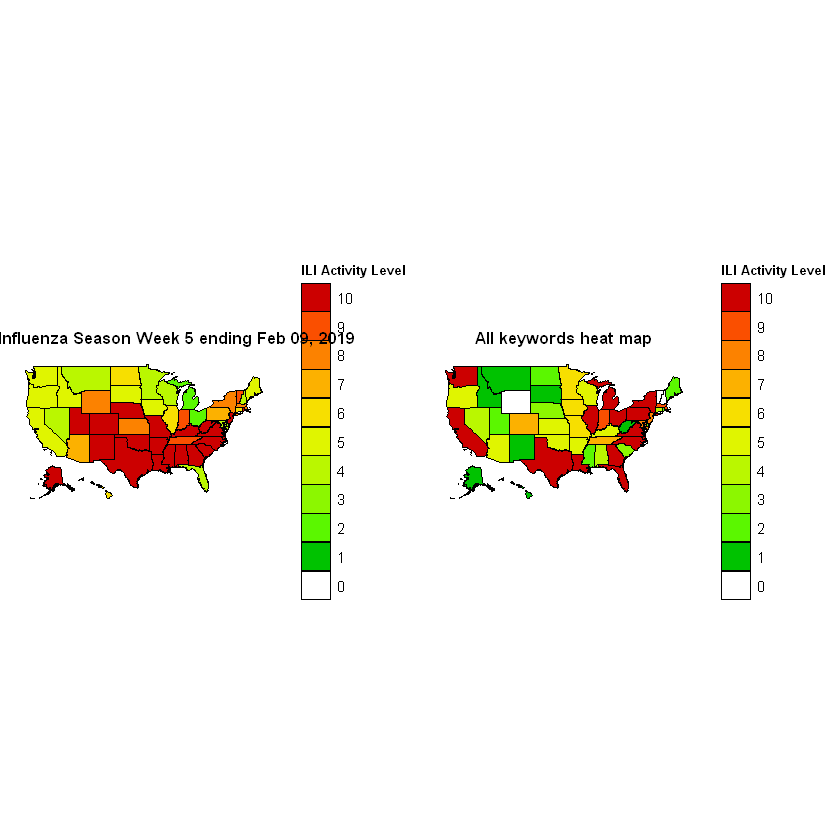

In [330]:
grid.arrange(chart3, combined, ncol=2)

OBSERVATIONS : 

## TASK 5 : CDC vs Flu vs Influenza vs Got Flu

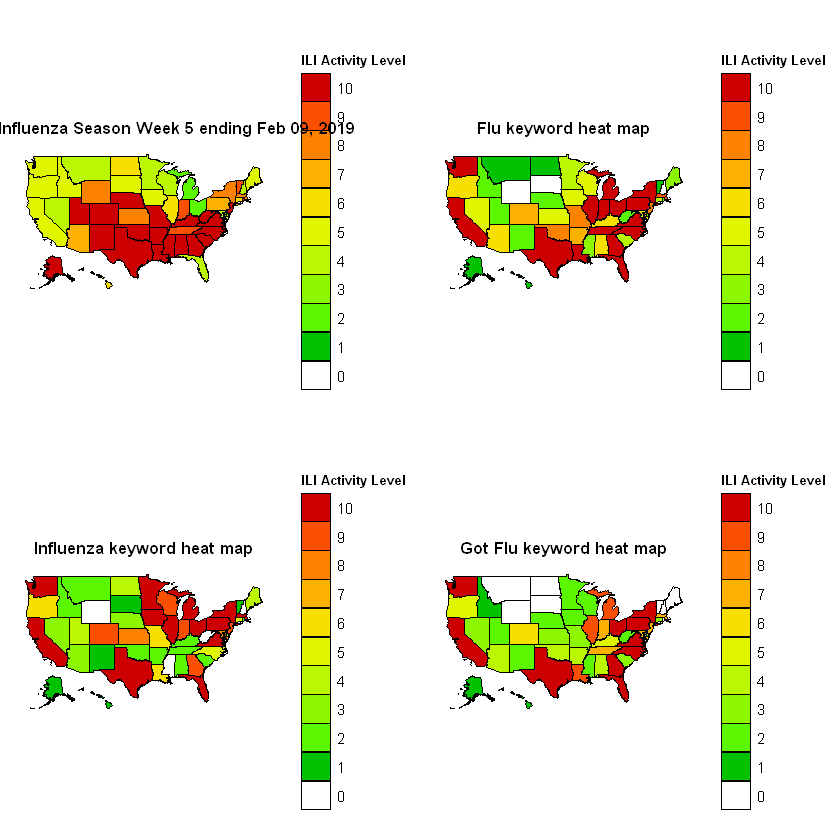

In [331]:
grid.arrange(chart3, flu, influenza, gotFlu, ncol=2)

OBSERVATIONS : 